In [ ]:
we will drop those features that are highly corelated with each other, if features are highly corelated then their is a 
chance of redundancy in data. we will not drop those independent features that are highly corelated with the 
depenedent feature, we will only dro those indepenedent features that are highly corelated with each other.

In [ ]:
Pearson correlation is a measure of the linear relationship between two variables. Here’s an easy way to understand it:

### Key Points:
1. **Range**: The Pearson correlation coefficient, often denoted as \( r \), ranges from -1 to 1.
   - **+1**: Perfect positive linear relationship (as one variable increases, the other also increases).
   - **-1**: Perfect negative linear relationship (as one variable increases, the other decreases).
   - **0**: No linear relationship (the variables don’t seem to move together in a linear way).

2. **Calculation**: It’s calculated by looking at how much the variables change together, divided by the product of their standard deviations.

3. **Interpretation**:
   - **High positive correlation** (\( r \) close to +1): When one variable goes up, the other tends to go up as well.
   - **High negative correlation** (\( r \) close to -1): When one variable goes up, the other tends to go down.
   - **No correlation** (\( r \) close to 0): There is no consistent pattern in the way the variables move together.

### Example:
Imagine you have data on the number of hours studied and exam scores for a group of students. If students who study more tend to score higher, you would expect a positive Pearson correlation between hours studied and exam scores. If the correlation coefficient \( r \) is 0.8, it means there is a strong positive linear relationship between the two variables.

### Simple Formula:
The formula for Pearson correlation is:
\[ r = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y} \]

Where:
- \( \text{cov}(X, Y) \) is the covariance of variables \( X \) and \( Y \).
- \( \sigma_X \) and \( \sigma_Y \) are the standard deviations of \( X \) and \( Y \), respectively.

### Visual Representation:
- A scatter plot with data points closely aligned along a straight line going upwards indicates a high positive correlation.
- A scatter plot with data points closely aligned along a straight line going downwards indicates a high negative correlation.
- A scatter plot with data points scattered randomly indicates no correlation.

### Quick Summary:
Pearson correlation tells you how strongly two variables are related in a linear way. The closer the correlation coefficient is to +1 or -1, the stronger the linear relationship.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
from sklearn.datasets import load_iris
arr=load_iris()
arr.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
arr.data contains the data of the dataset and arr.feature_names will give the names of only indepenedent features

In [71]:
dataset=pd.DataFrame(arr.data, columns=arr.feature_names)
dataset["target"]=arr.target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
x=dataset.drop("target", axis=1)
y=dataset["target"]

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [74]:
dataset.shape, x_train.shape, x_test.shape

((150, 5), (105, 4), (45, 4))

In [75]:
corelation=x_train.corr()
corelation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.135681,0.861906,0.804048
sepal width (cm),-0.135681,1.000000,-0.469273,-0.415078
petal length (cm),0.861906,-0.469273,1.000000,0.960011
petal width (cm),0.804048,-0.415078,0.960011,1.000000


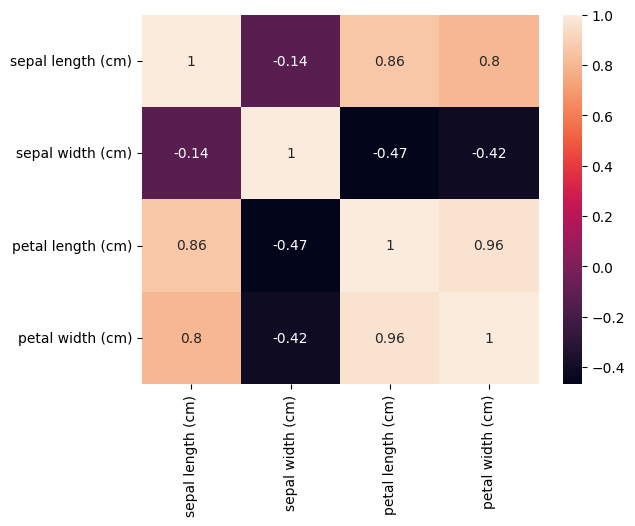

In [76]:
sns.heatmap(corelation, annot=True)
plt.show()

In [83]:
def droping(x_data, threshold):
    high_corelated=set()
    corelation_matrix=x_train.corr()
    for i in corelation_matrix.columns:
        for j in corelation_matrix.columns:
            if i!=j:
                corelation=corelation_matrix.loc[i,j]
                if corelation >=threshold:
                    high_corelated.add(j)
    return high_corelated
corelated_features=droping(x_train, 0.8)
print(corelated_features)

# {'sepal length (cm)', 'petal length (cm)', 'petal width (cm)'}  so these featurs are highly corelated, we
# will drop them out

{'sepal length (cm)', 'petal length (cm)', 'petal width (cm)'}


In [87]:
x_train=x_train.drop(corelated_features, axis=1)
x_test=x_test.drop(corelated_features, axis=1)


,sepal width (cm)
27,3.5
61,3.0
73,2.8
133,2.8
26,3.4
79,2.6
56,3.3
29,3.2
68,2.2
77,3.0


<h3> now we will do it on big data </h3>

In [93]:
from sklearn.datasets import load_digits
arr=load_digits()
dataset=pd.DataFrame(arr.data, columns=arr.feature_names)
dataset["target"]=arr.target
dataset.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [95]:
dataset.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [101]:
corelation_matrix= dataset.corr()
corelation_matrix

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_0_2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_0_3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
pixel_0_4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
pixel_7_5,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991,-0.079100
pixel_7_6,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428,-0.114007
pixel_7_7,NaN,-0.043889,0.082523,0.081971,-0.215349,-0.167727,-0.080309,-0.024505,-0.005226,-0.001404,...,0.563989,-0.004625,-0.047089,0.031193,0.099671,0.103015,0.261991,0.620428,1.000000,-0.181929


In [97]:
x=dataset.drop("target", axis=1)
y=dataset["target"]

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [109]:
def droping(x_data, threshold):
    highly_corelated=set()
    corelation_matrix=x_data.corr()
    for i in corelation_matrix.columns:
        for j in corelation_matrix.columns:
            if i!=j:
                if corelation_matrix.loc[i,j] >=threshold:
                    highly_corelated.add(j)
    return highly_corelated

high_cor=droping(x_train, 0.8)
print(high_cor)


{'pixel_7_2', 'pixel_7_1', 'pixel_0_1', 'pixel_7_0', 'pixel_0_2', 'pixel_6_0'}


In [112]:
x_train=x_train.drop(high_cor, axis=1)
x_test=x_test.drop(high_cor, axis=1)
x_train.shape

(1257, 58)